Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [35]:
# import some data to play with
data=pd.read_csv('Fraud_check.csv')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [37]:
#Reorder the columns
data = data[["Taxable.Income", "Undergrad", "Marital.Status","City.Population","Work.Experience","Urban"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Taxable.Income   600 non-null    int64 
 1   Undergrad        600 non-null    object
 2   Marital.Status   600 non-null    object
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [38]:
#Rename the columns
data = data.rename(columns={"Taxable.Income":"Income", "Marital.Status":"M_Status","City.Population":"C_Population","Work.Experience":"W_Experience"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Income        600 non-null    int64 
 1   Undergrad     600 non-null    object
 2   M_Status      600 non-null    object
 3   C_Population  600 non-null    int64 
 4   W_Experience  600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
#Complete Iris dataset
#label_encoder = preprocessing.LabelEncoder()
#Company['Sales']= label_encoder.fit_transform(Company['Sales'])

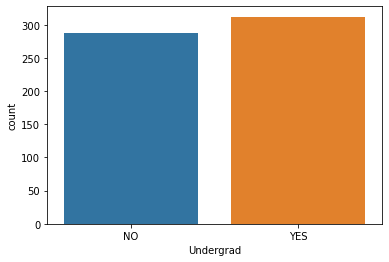

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


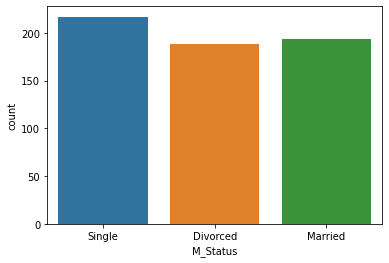

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


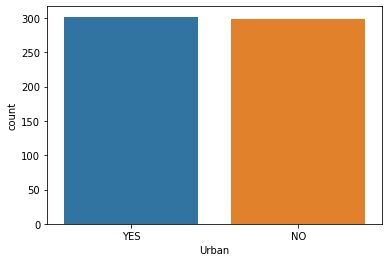

In [39]:
# checking count of categories for categorical columns colums
import seaborn as sns

sns.countplot(data['Undergrad'])
plt.show()

sns.countplot(data['M_Status'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

In [41]:
data

,Income,Undergrad,M_Status,C_Population,W_Experience,Urban
0,68833,NO,Single,50047,10,YES
1,33700,YES,Divorced,134075,18,YES
2,36925,NO,Married,160205,30,YES
3,50190,YES,Single,193264,15,YES
4,81002,NO,Married,27533,28,NO
...,...,...,...,...,...,...
595,76340,YES,Divorced,39492,7,YES
596,69967,YES,Divorced,55369,2,YES
597,47334,NO,Divorced,154058,0,YES
598,98592,YES,Married,180083,17,NO


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


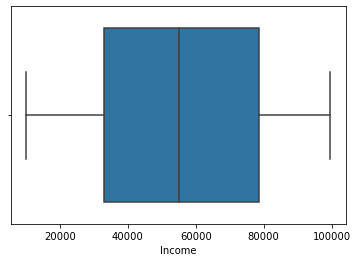

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


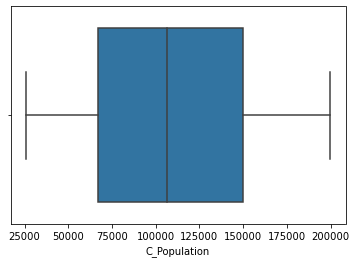

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


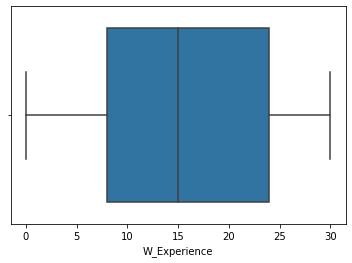

In [42]:
# Checking for outliers in numerical data
sns.boxplot(data['Income'])
plt.show()

sns.boxplot(data['C_Population'])
plt.show()

sns.boxplot(data['W_Experience'])
plt.show()

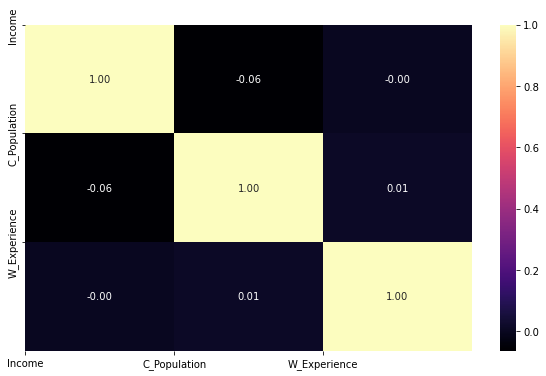

In [16]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Income        600 non-null    int64 
 1   Undergrad     600 non-null    object
 2   M_Status      600 non-null    object
 3   C_Population  600 non-null    int64 
 4   W_Experience  600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [44]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data['Income'] = pd.cut(x = data['Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data

,Income,Undergrad,M_Status,C_Population,W_Experience,Urban
0,Good,NO,Single,50047,10,YES
1,Good,YES,Divorced,134075,18,YES
2,Good,NO,Married,160205,30,YES
3,Good,YES,Single,193264,15,YES
4,Good,NO,Married,27533,28,NO
...,...,...,...,...,...,...
595,Good,YES,Divorced,39492,7,YES
596,Good,YES,Divorced,55369,2,YES
597,Good,NO,Divorced,154058,0,YES
598,Good,YES,Married,180083,17,NO


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

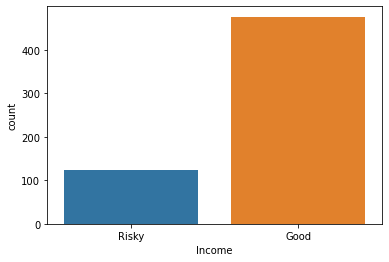

In [45]:
sns.countplot(data['Income'])

In [46]:
data['Income'].value_counts()

Good     476
Risky    124
Name: Income, dtype: int64

In [48]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['M_Status'] = label_encoder.fit_transform(data['M_Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['Income'] = label_encoder.fit_transform(data['Income'])
data

,Income,Undergrad,M_Status,C_Population,W_Experience,Urban
0,0,0,2,50047,10,1
1,0,1,0,134075,18,1
2,0,0,1,160205,30,1
3,0,1,2,193264,15,1
4,0,0,1,27533,28,0
...,...,...,...,...,...,...
595,0,1,0,39492,7,1
596,0,1,0,55369,2,1
597,0,0,0,154058,0,1
598,0,1,1,180083,17,0


In [49]:
# dropping column taxable_income
data1 = data.drop('Income', axis = 1)
data1

,Undergrad,M_Status,C_Population,W_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


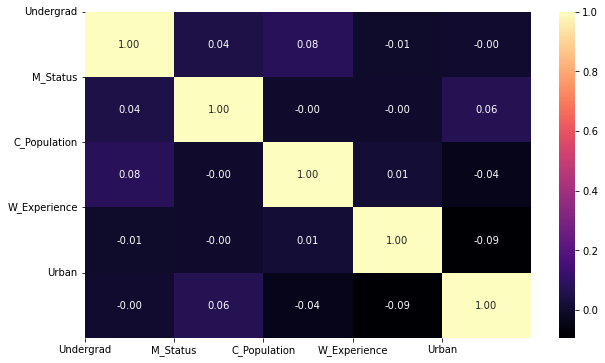

In [50]:
# Correlation analysis for data11
corr = data1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [54]:
# Dividing data into independent variables and dependent variable
x = data.drop('Income', axis = 1)
y = data['Income']

In [55]:
x

,Undergrad,M_Status,C_Population,W_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32

In [57]:
data['Income'].unique()

array([0, 1])

In [59]:
data.Income.value_counts()

0    476
1    124
Name: Income, dtype: int64

In [60]:
colnames = list(data.columns)
colnames

['Income', 'Undergrad', 'M_Status', 'C_Population', 'W_Experience', 'Urban']

In [62]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=40)

In [71]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
85,2,0,1,2,2,2,2,2,0,0
69,2,2,1,2,2,2,0,1,1,0
203,2,0,1,1,0,0,1,2,1,0
379,2,0,1,0,2,0,2,0,1,0
261,2,1,1,2,2,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
306,2,1,1,1,2,2,2,1,1,1
165,0,2,1,1,0,0,1,0,1,1
7,0,0,2,0,2,1,0,1,1,1
219,2,0,2,0,2,1,2,0,1,1


In [63]:
y_train

454    0
82     0
146    0
298    0
331    1
      ..
440    0
165    0
7      0
219    1
326    1
Name: Income, Length: 402, dtype: int32

In [64]:
x_test

,Undergrad,M_Status,C_Population,W_Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
...,...,...,...,...,...
78,1,0,143153,0,0
380,1,1,197699,2,0
199,1,1,145744,9,1
101,1,1,50490,20,1


In [65]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
78     0
380    0
199    1
101    0
438    1
Name: Income, Length: 198, dtype: int32

### Building Decision Tree Classifier using Entropy Criteria

In [68]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

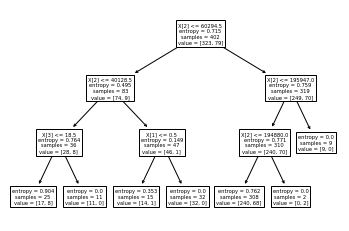

In [69]:
#PLot the decision tree
tree.plot_tree(model);


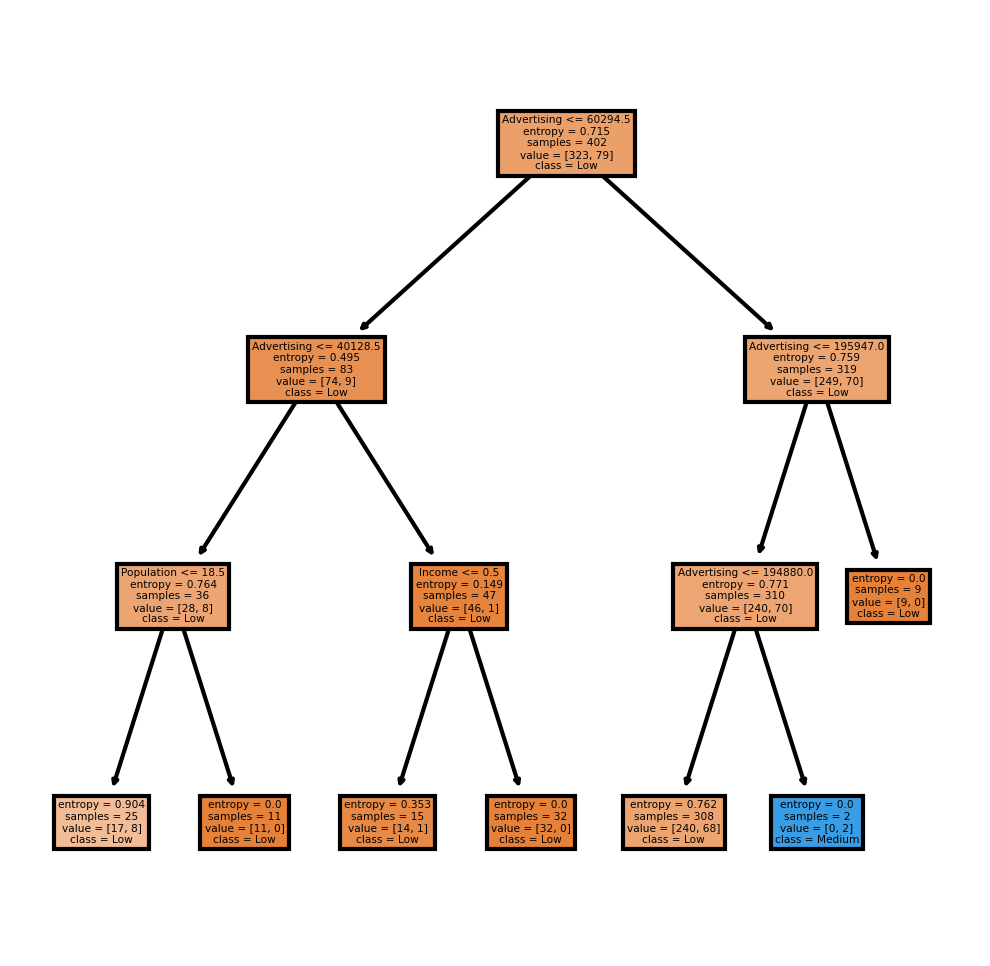

In [70]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [71]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    197
1      1
dtype: int64

In [72]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Income,,
0,152,1
1,45,0


In [74]:
# Accuracy 
np.mean(preds==y_test)

0.7676767676767676

### Building Decision Tree Classifier (CART) using Gini Criteria

In [75]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [77]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [78]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7676767676767676

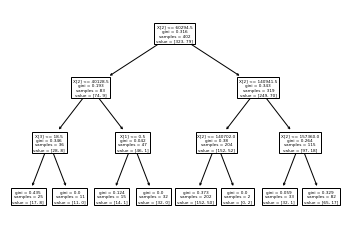

In [79]:
# Plotting Decision tree
tree.plot_tree(model_gini);

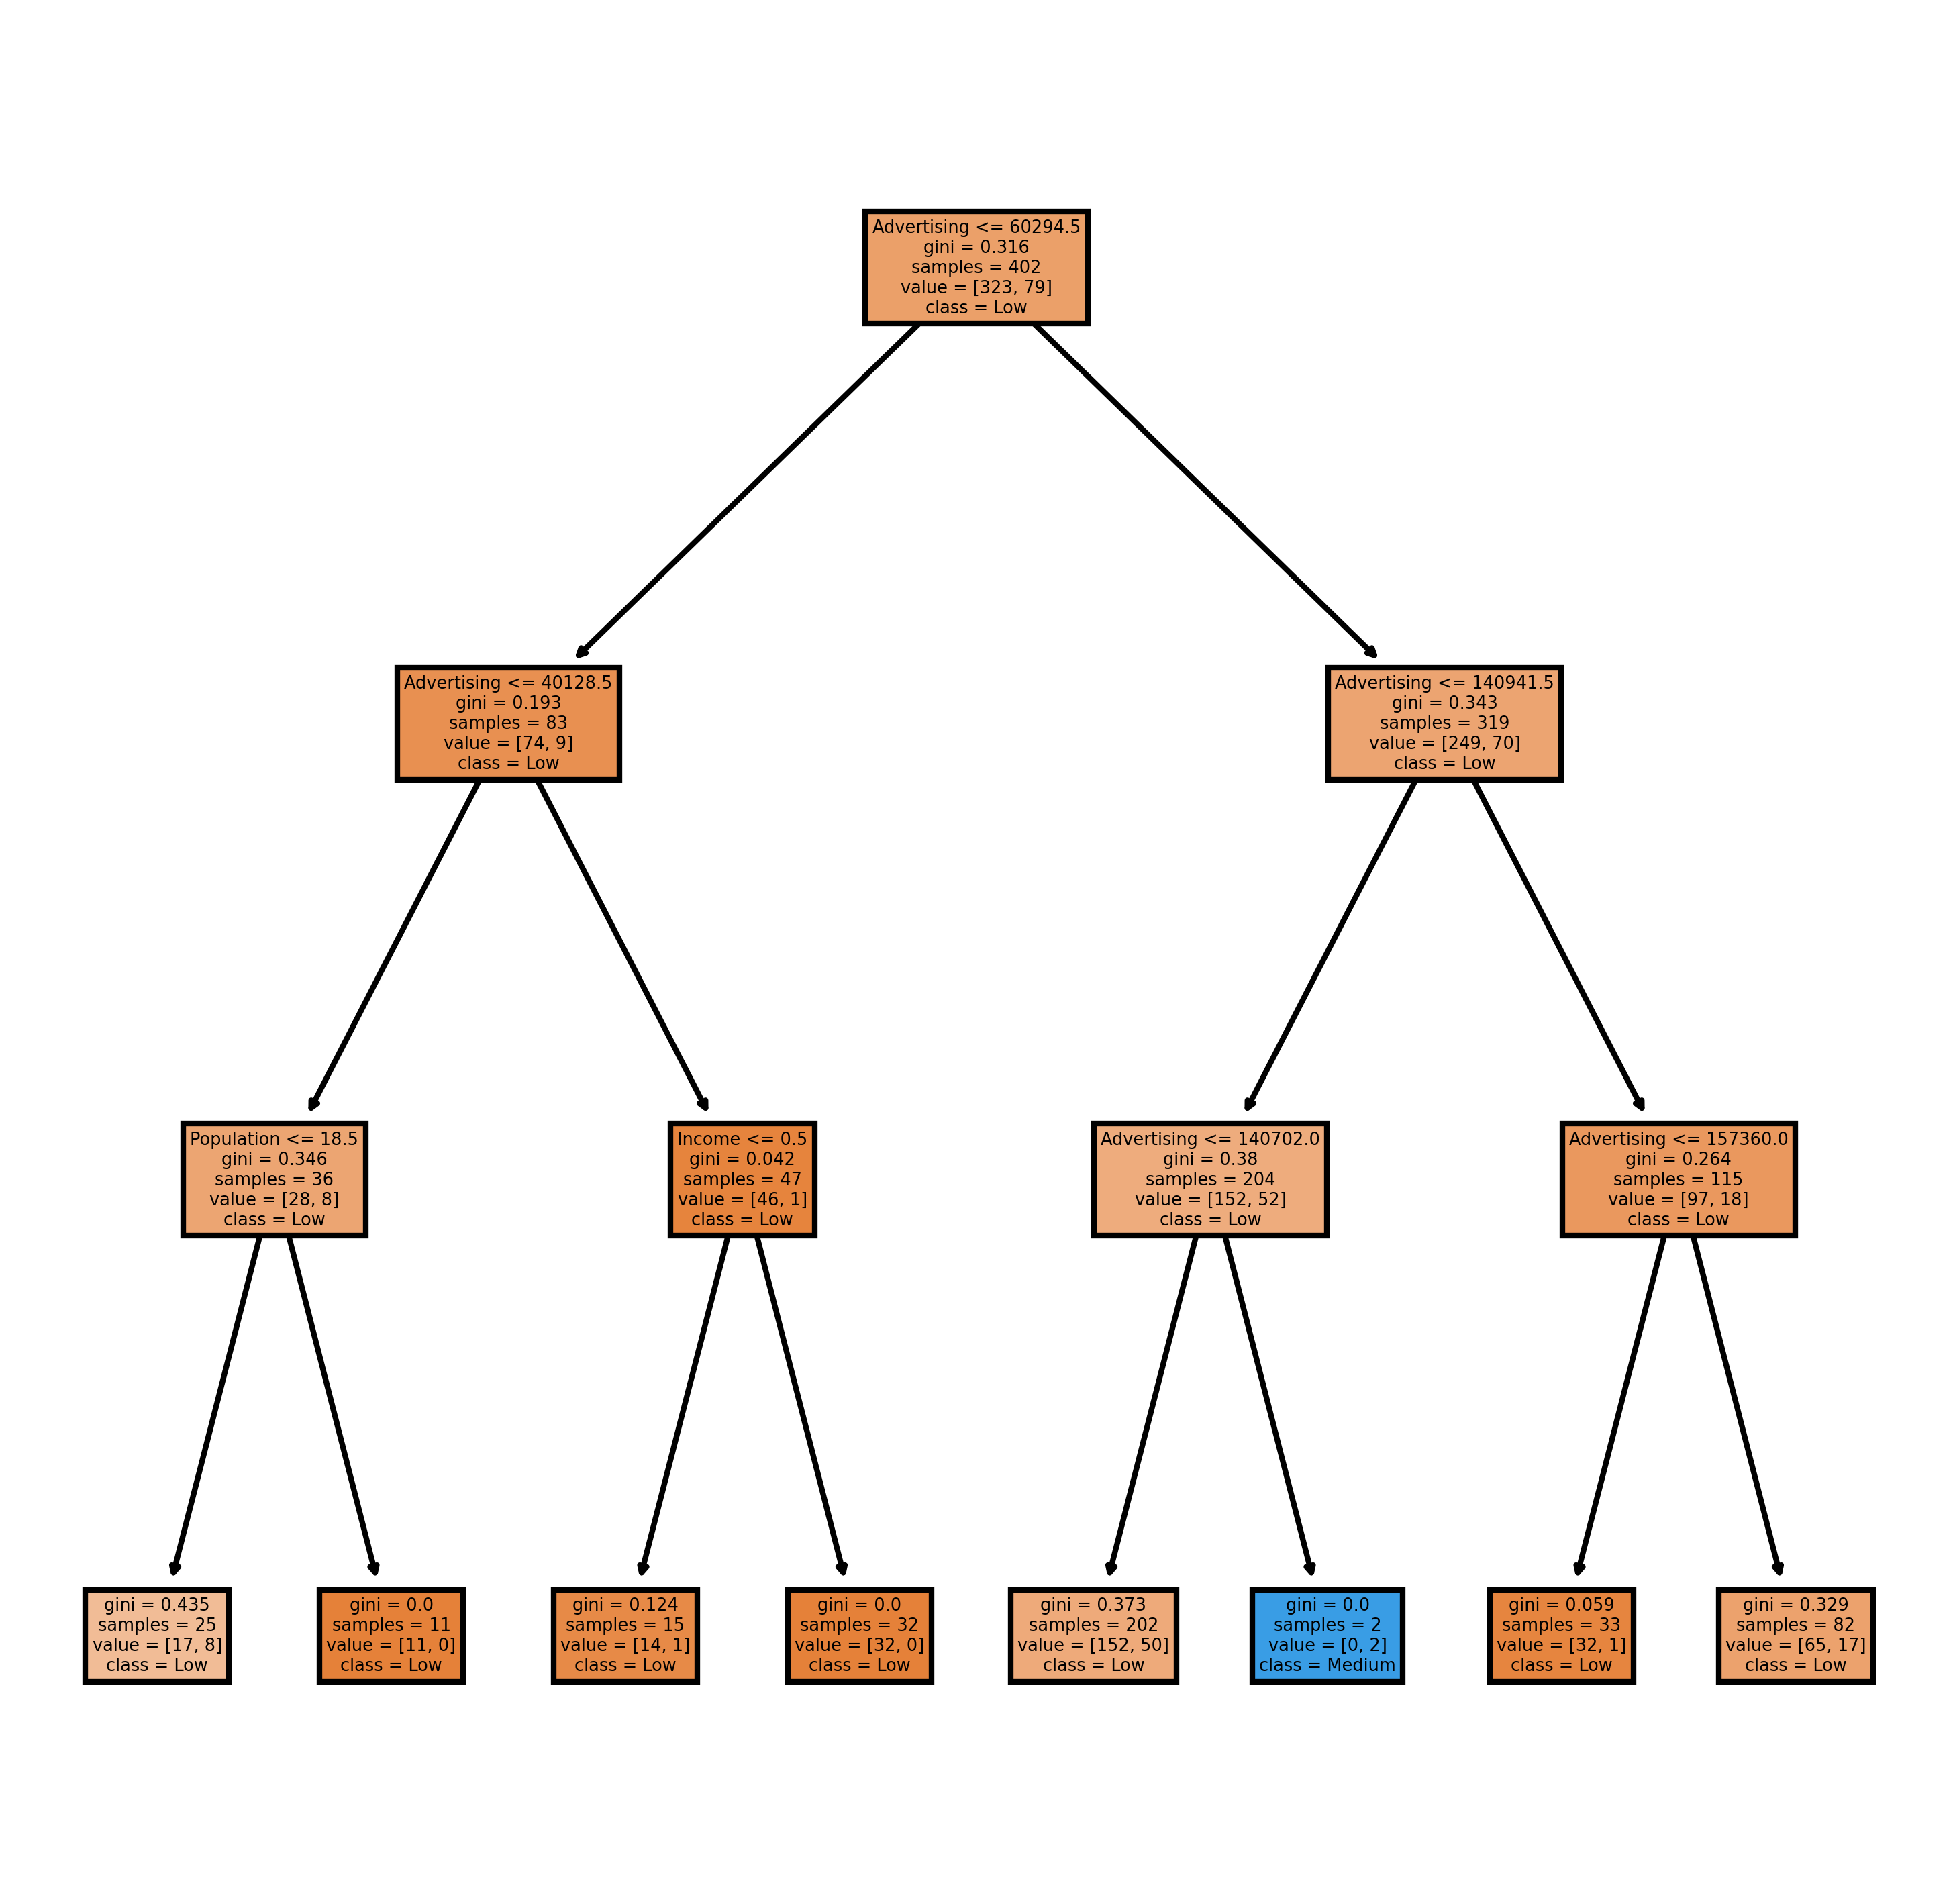

In [80]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [81]:
# Predicting Data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

0    198
dtype: int64

In [82]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0
Income,
0,153
1,45


In [84]:
# Checking accuracy of model
model_gini.score(x_test, y_test)

0.7727272727272727

#### Decision Tree Regression Example

In [85]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [86]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [88]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [89]:
#Find the accuracy
model.score(X_test,y_test)

0.019958899887438264